<a href="https://colab.research.google.com/github/Nisasoylu/GNN/blob/main/Handling_Data_in_PyG_(Karate_Dataset).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
!pip install torch-geometric

In [40]:
import torch
import networkx as nx
import matplotlib.pyplot as plt
from torch_geometric.datasets import KarateClub

In [41]:
karate_dataset = KarateClub()
print(f"Dataset: {karate_dataset}")
print(f"Number of graphs: {len(karate_dataset)}")
print(f"Number of features: {karate_dataset.num_features}")
print(f"Number of classes: {karate_dataset.num_classes}")
print(f"Number of Node features: {karate_dataset.num_node_features}")
print(f"Number of Edge features: {karate_dataset.num_edge_features}")

Dataset: KarateClub()
Number of graphs: 1
Number of features: 34
Number of classes: 4
Number of Node features: 34
Number of Edge features: 0


- This dataset holds exactly one graph,
- Each node in this dataset is assigned a 34-dimensional feature vector (which uniquely describes the members of the karate club).
- The graph holds exactly 4 classes, which represent the community each node belongs to.

In [42]:
data = karate_dataset[0]
data

Data(x=[34, 34], edge_index=[2, 156], y=[34], train_mask=[34])

- **data.x**: Node feature matrix with shape [num_nodes, num_node_features]
- **data.edge_index**: Graph connectivity in COO format with shape [2, num_edges] and type torch.long
- **data.edge_attr**: Edge feature matrix with shape [num_edges, num_edge_features]
- **data.y**: Target to train against (may have arbitrary shape), e.g., node-level targets of shape [num_nodes, *] or graph-level targets of shape [1, *]
- **data.pos**: Node position matrix with shape [num_nodes, num_dimensions]

https://pytorch-geometric.readthedocs.io/en/latest/notes/introduction.html

- The edge_index property holds the information about the graph connectivity, i.e., a tuple of source and destination node indices for each edge.
- node features as x (each of the 34 nodes is assigned a 34-dim feature vector)
- node labels as y (each node is assigned to exactly one class).

In [43]:
print(f"Number of nodes: {data.num_nodes}")
print(f"Number of edges: {data.num_edges}")
print(f"Average node degree: {data.num_edges / data.num_nodes:.2f}")
print(f"Has isolated nodes: {data.has_isolated_nodes()}") # if in this graph, are there any nodes which do not connect with any other node.
print(f"Has self-loops: {data.has_self_loops()}")
print(f"Is Directed: {data.is_directed()}")
print(f"Is undirected: {data.is_undirected()}")

Number of nodes: 34
Number of edges: 156
Average node degree: 4.59
Has isolated nodes: False
Has self-loops: False
Is Directed: False
Is undirected: True


In [44]:
data.node_stores # Gives detailed information about data

[{'x': tensor([[1., 0., 0.,  ..., 0., 0., 0.],
         [0., 1., 0.,  ..., 0., 0., 0.],
         [0., 0., 1.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 1., 0., 0.],
         [0., 0., 0.,  ..., 0., 1., 0.],
         [0., 0., 0.,  ..., 0., 0., 1.]]), 'edge_index': tensor([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,
           1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,
           3,  3,  3,  3,  3,  4,  4,  4,  5,  5,  5,  5,  6,  6,  6,  6,  7,  7,
           7,  7,  8,  8,  8,  8,  8,  9,  9, 10, 10, 10, 11, 12, 12, 13, 13, 13,
          13, 13, 14, 14, 15, 15, 16, 16, 17, 17, 18, 18, 19, 19, 19, 20, 20, 21,
          21, 22, 22, 23, 23, 23, 23, 23, 24, 24, 24, 25, 25, 25, 26, 26, 27, 27,
          27, 27, 28, 28, 28, 29, 29, 29, 29, 30, 30, 30, 30, 31, 31, 31, 31, 31,
          31, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 33, 33, 33, 33, 33,
          33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33],
    

In [45]:
data.to_dict()

{'x': tensor([[1., 0., 0.,  ..., 0., 0., 0.],
         [0., 1., 0.,  ..., 0., 0., 0.],
         [0., 0., 1.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 1., 0., 0.],
         [0., 0., 0.,  ..., 0., 1., 0.],
         [0., 0., 0.,  ..., 0., 0., 1.]]),
 'edge_index': tensor([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,
           1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,
           3,  3,  3,  3,  3,  4,  4,  4,  5,  5,  5,  5,  6,  6,  6,  6,  7,  7,
           7,  7,  8,  8,  8,  8,  8,  9,  9, 10, 10, 10, 11, 12, 12, 13, 13, 13,
          13, 13, 14, 14, 15, 15, 16, 16, 17, 17, 18, 18, 19, 19, 19, 20, 20, 21,
          21, 22, 22, 23, 23, 23, 23, 23, 24, 24, 24, 25, 25, 25, 26, 26, 27, 27,
          27, 27, 28, 28, 28, 29, 29, 29, 29, 30, 30, 30, 30, 31, 31, 31, 31, 31,
          31, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 33, 33, 33, 33, 33,
          33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33],
    

In [46]:
print(data.edge_index.t()) # Edge index in tensor format

tensor([[ 0,  1],
        [ 0,  2],
        [ 0,  3],
        [ 0,  4],
        [ 0,  5],
        [ 0,  6],
        [ 0,  7],
        [ 0,  8],
        [ 0, 10],
        [ 0, 11],
        [ 0, 12],
        [ 0, 13],
        [ 0, 17],
        [ 0, 19],
        [ 0, 21],
        [ 0, 31],
        [ 1,  0],
        [ 1,  2],
        [ 1,  3],
        [ 1,  7],
        [ 1, 13],
        [ 1, 17],
        [ 1, 19],
        [ 1, 21],
        [ 1, 30],
        [ 2,  0],
        [ 2,  1],
        [ 2,  3],
        [ 2,  7],
        [ 2,  8],
        [ 2,  9],
        [ 2, 13],
        [ 2, 27],
        [ 2, 28],
        [ 2, 32],
        [ 3,  0],
        [ 3,  1],
        [ 3,  2],
        [ 3,  7],
        [ 3, 12],
        [ 3, 13],
        [ 4,  0],
        [ 4,  6],
        [ 4, 10],
        [ 5,  0],
        [ 5,  6],
        [ 5, 10],
        [ 5, 16],
        [ 6,  0],
        [ 6,  4],
        [ 6,  5],
        [ 6, 16],
        [ 7,  0],
        [ 7,  1],
        [ 7,  2],
        [ 

In [47]:
# Classes:
data.y

tensor([1, 1, 1, 1, 3, 3, 3, 1, 0, 1, 3, 1, 1, 1, 0, 0, 3, 1, 0, 1, 0, 1, 0, 0,
        2, 2, 0, 0, 2, 0, 0, 2, 0, 0])

In [48]:
# Node features:
data.x

tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 1., 0., 0.],
        [0., 0., 0.,  ..., 0., 1., 0.],
        [0., 0., 0.,  ..., 0., 0., 1.]])

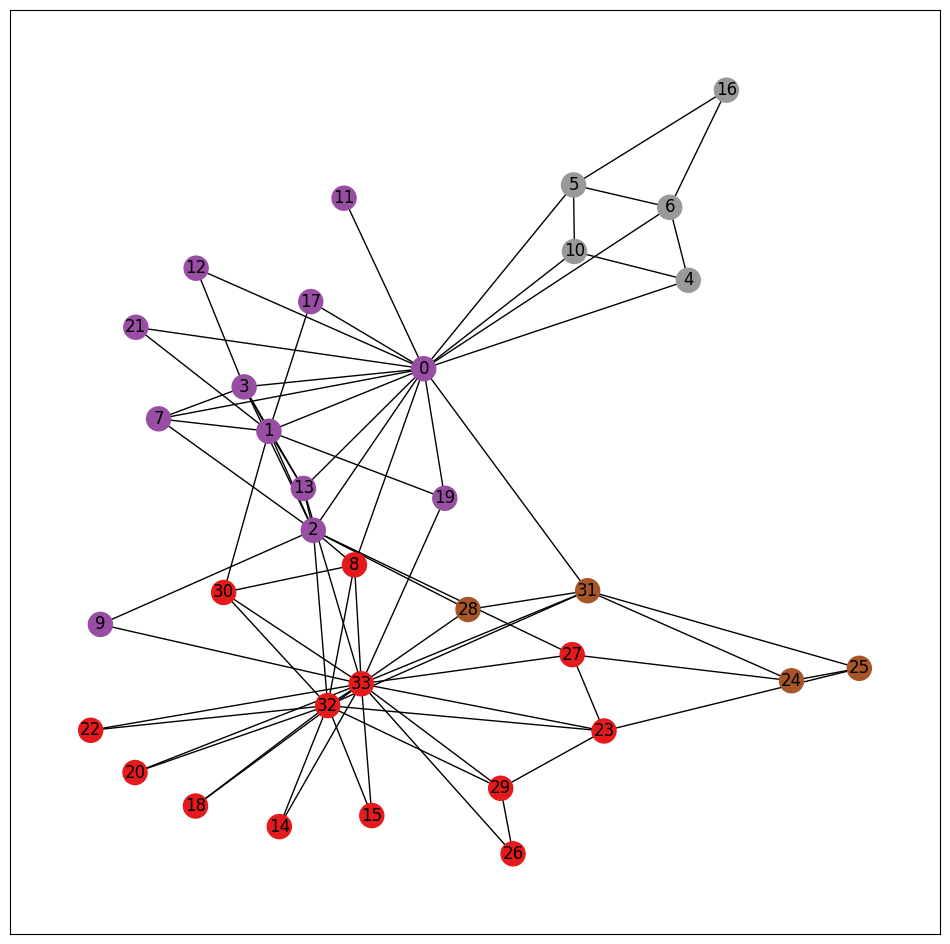

In [49]:
def visualize_graph(graph, color):
    plt.figure(figsize=(12,12))
    plt.xticks([])
    plt.yticks([])
    nx.draw_networkx(graph, pos=nx.spring_layout(graph, seed=42), with_labels=True, node_color=color, cmap="Set1")
    plt.show()

from torch_geometric.utils import to_networkx
karate_undirected_graph = to_networkx(data, to_undirected=True)
visualize_graph(karate_undirected_graph, color=data.y)  # Color the graph, based on the labels

In [55]:
print(karate_undirected_graph.number_of_edges())
print(karate_undirected_graph.degree)

78
[(0, 16), (1, 9), (2, 10), (3, 6), (4, 3), (5, 4), (6, 4), (7, 4), (8, 5), (9, 2), (10, 3), (11, 1), (12, 2), (13, 5), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 3), (20, 2), (21, 2), (22, 2), (23, 5), (24, 3), (25, 3), (26, 2), (27, 4), (28, 3), (29, 4), (30, 4), (31, 6), (32, 12), (33, 17)]


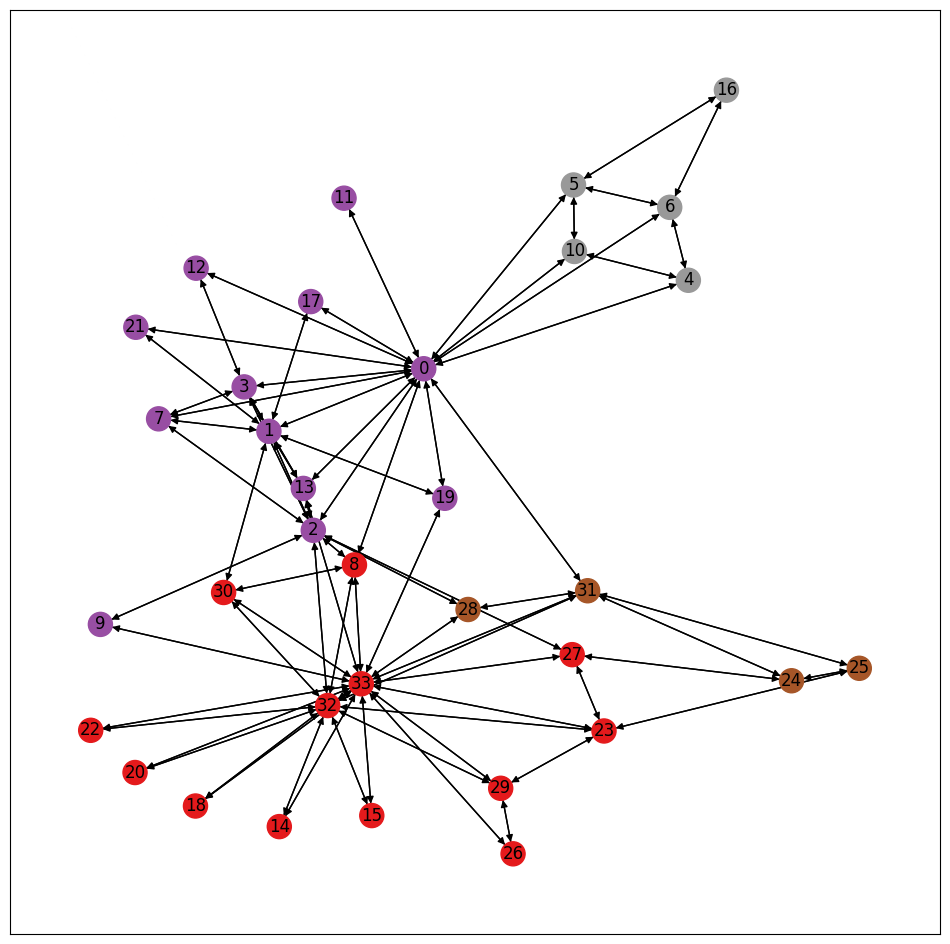

In [51]:
karate_directed_graph = to_networkx(data, to_undirected=False)
visualize_graph(karate_directed_graph, color=data.y)  # Color the graph, based on the labels

In [53]:
print(karate_directed_graph.number_of_edges())
print(karate_directed_graph.degree)

156
[(0, 32), (1, 18), (2, 20), (3, 12), (4, 6), (5, 8), (6, 8), (7, 8), (8, 10), (9, 4), (10, 6), (11, 2), (12, 4), (13, 10), (14, 4), (15, 4), (16, 4), (17, 4), (18, 4), (19, 6), (20, 4), (21, 4), (22, 4), (23, 10), (24, 6), (25, 6), (26, 4), (27, 8), (28, 6), (29, 8), (30, 8), (31, 12), (32, 24), (33, 34)]
